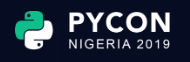

## Exploratory Data Analysis and Feature Engineering: Python a great tool to use.

### Pycon Nigeria 2019 workshop



While working on a particular data set many think the path to having a great model is through parameter tuning and optimizing the model. It is very common that the key is to actually take time to understand the data, perform exploratory data analysis and feature engineering to generate a dataset that is ready for the model. In this hands-on tutorial, a financial case study will be used to explain the rudiments of exploratory data analysis and feature engineering. The case study is centered around a fin-tech company that wants to provide its customers with a paid mobile app subscription which allows them to track their financial activities. The final aim is to access the customer’s app behavior from the data, this will help the company target some users who are interested in their services. Python libraries such as numpy, pandas, matplotlib, seaborn, etc will be used to achieve the goal of this tutorial. In the end, a worthy model will be developed from a cleaned dataset. The dataset is readily available for this tutorial.

## Tutorial Objectives

- Describe the data

- Clean the data

- Visualizations

- Calculate and visualize correlations

- Feature Engineering

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser 
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
eda = pd.read_csv('appdata10.csv')

### Descriptive Statistics

The first important step is to calculate some descriptive statistics for the data. Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary of the sample and measures of the data.

In [3]:
eda.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


The above table gave us the summary of data. It gives the mean, the total data points, standard deviation, the quartiles and the max and min (extreme values). It gives a holistic view of the dataset.  
N.B: NaN values are not computed in this summary.
 

In [4]:
eda.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### Data Shape. 
Check the number of rows and columns
N.B: Number on the left is the total rows and columns on the right: (rows, columns)

In [5]:
eda.shape

(50000, 12)

From the above, we have 50000 rows and 12 columns. Meaning there are 12 features. 

## Data Profile
Check the data types of each columns. 

In [6]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


We can see that the enrolled date column has some NaN values. The memory used by this dataframe is 4.6+ MB

## Data types

In [7]:
eda.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

N.B: first_open, enrolled_date, hour will be our main focus in the feature engineering exercise. Simply because, we need to change the data types. 

# Visualizations

In [8]:
eda['hour'] = eda.hour.str.slice(1,3).astype(int)

In [9]:
visuals = eda.copy().drop(columns = ['user', 'first_open', 'screen_list', 'enrolled', 
                                     'enrolled_date'])

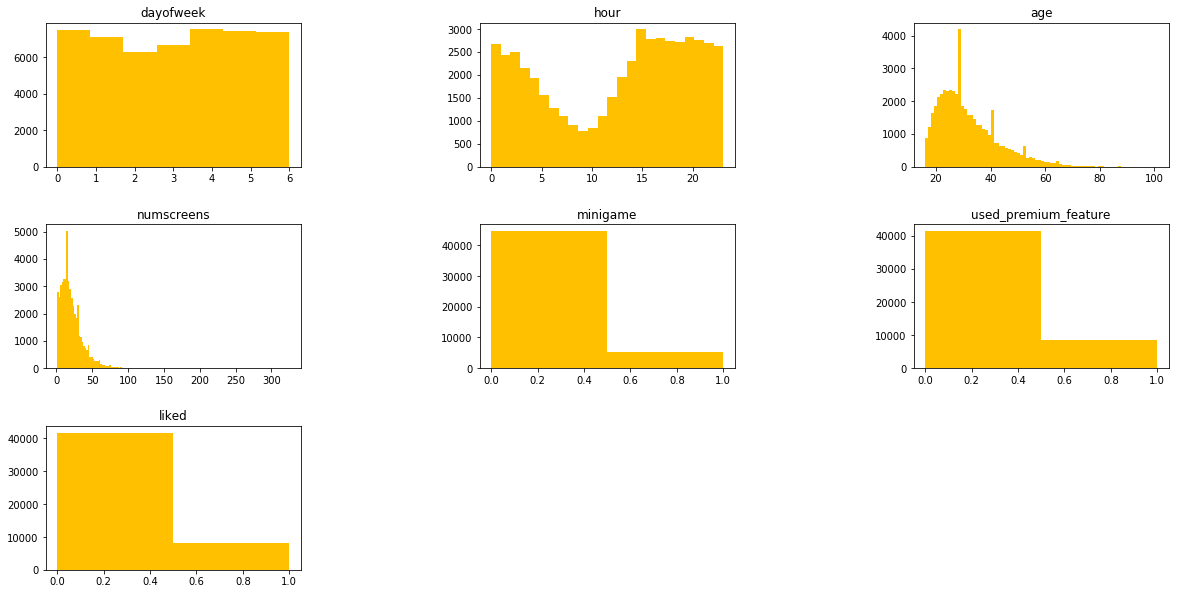

In [10]:
for i in range(1, visuals.shape[1]+ 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(visuals.columns.values[i -1])
    #set bins size
    vals = np.size(visuals.iloc[:, i-1].unique())
    plt.subplots_adjust(left = 0.4, bottom=0.1, right=3, top=2, wspace = 0.7, hspace= 0.4)
    #the above is important to space the visuals
    plt.hist(visuals.iloc[:, i-1], bins = vals, color = '#FFC000')

Day of the week is evenly distributed, no particular day is highly focused on when using the app. 
The big dip in the hour plot shows that the time of usage is late in the night(time conversion). This makes sense because less usage is expected during odd hours. 
The age plots shows a even distribution across. Expect for the big jump around 30, 40,50. 
The plot of numscreens shows that the number of screens is right skewed as the majority of the screens viewed falls within 0-100. It can still be said that the distribution is even. 
The mini game plot depicts that most people hasn't played.
Same thing goes for the premium features and liked. 

### Correlation Statistics. 

There are lots of codes online for correlation plot. Simply use one to understand the linear dependency of the features in the data. For the machine learning model, we don't want features that are linearly dependent on each other. Hence correlation plots help to understand. 

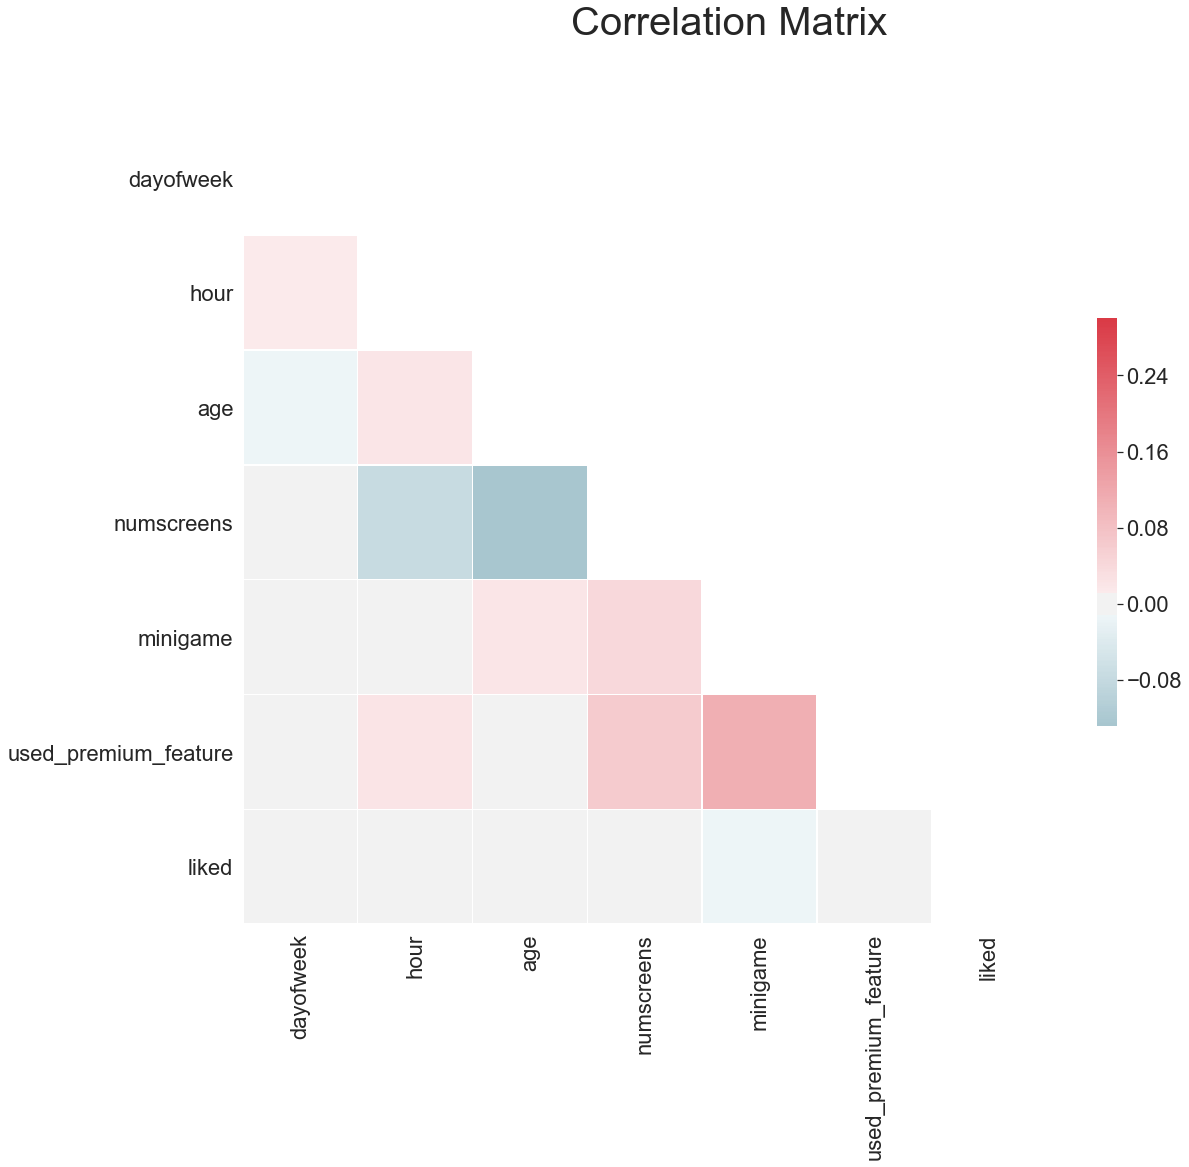

In [11]:

## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = visuals.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Engineering
In this section, we will carry out the process of creating new features that makes the machine learning algorithm predicts better. Domain knowledge is important in this section. Feature engineering is a difficult process, because it doesn't guarantee that your algorithm will predict better. The hack is to spend time brainstorming or testing out features, decide and create the features, check how it works with the model, improve and go back to brainstorming/creating until the work is done.  

### FE for Date columns

In [12]:
eda.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

Parser module is used convert from the object data type to the date/time format. THe module offers a generic date/time string parser which is able to parse most known formats to represent date/time. 

In [13]:
eda["first_open"] = [parser.parse(row_date) for row_date in eda["first_open"]]
eda["enrolled_date"] = [parser.parse(row_date) if isinstance (row_date, str) else row_date for row_date in eda["enrolled_date"]]

In [14]:
eda.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

The date columns are in the proper data type formats. 

### Create Response Time

In [15]:
eda["difference"] = (eda.enrolled_date - eda.first_open).astype('timedelta64[h]')

### Distplot of response time

In [16]:
#eda['difference'].dropna().hist(bins=10, grid=True, xlabelsize=12, ylabelsize=12)

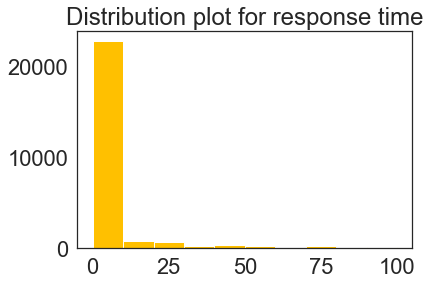

In [17]:
plt.hist(eda['difference'].dropna(), color ="#FFC000", range = [0,100])
plt.title("Distribution plot for response time")
plt.show()

From above, we have most response time around 50 hours. 

In [18]:
eda.loc[eda.difference > 48, 'enrolled'] = 0

In [19]:
eda.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [20]:
eda = eda.drop(columns = ['enrolled_date', 'difference', 'first_open'])

### Creating screen groupings

In [21]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [22]:
eda['screen_list'] = eda.screen_list.astype(str) + ','

In [23]:
for sc in top_screens:
    eda[sc] = eda.screen_list.str.contains(sc).astype(int)
    eda['screen_list'] = eda.screen_list.str.replace(sc+",", "")
eda['other'] = eda.screen_list.str.count(",")
eda = eda.drop(columns = ['screen_list'])

In [24]:
eda.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


You can decide to further group each screens category before developing the model. 

In [25]:
eda.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

A lot of screens are correlated to each other, because they are similar. N.B: We do not want any correlation in our model. 

In [29]:
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", 
                   "Saving5", "Saving6", "Saving7", "Saving8", "Saving9", "Saving10"]
eda['SavingsCount'] = eda[savings_screens].sum(axis=1)
eda = eda.drop(columns = savings_screens)

In [31]:
credit_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard"]
eda['CreditCount'] = eda[credit_screens].sum(axis=1)
eda = eda.drop(columns = credit_screens)

In [32]:
cc_screens = ["CC1", "CC1Category", "CC3"]
eda['CCcount'] = eda[cc_screens].sum(axis=1)
eda = eda.drop(columns = cc_screens)

In [34]:
loans_screens = ["Loan", "Loan2", "Loan3", "Loan4"]
eda['LoanCount'] = eda[loans_screens].sum(axis=1)
eda = eda.drop(columns = loans_screens)

In [35]:
eda.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'SavingsCount', 'CreditCount', 'CCcount', 'LoanCount'],
      dtype='object')

All correlated screens has been grouped into one column to help the model predict better. 

In [36]:
eda.to_csv('edataset.csv', index = False)

## Thank you for your Attention. 
### References: 
- Machine Learning Practical: 6 Real-World Applications by Kirill Eremenko, Hadelin de Ponteves, Dr. Ryan Ahmed, Ph.D., MBA, SuperDataScience Team, Rony Sulca
- Exploratory Data Analysis with Python by Veronika Rovnik
- Exploratory Data Analysis Tutorial in Python by Christopher Bratkovics

